In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd 'drive/My Drive/Colab Notebooks/dw_smog/dw-warsaw-project/'

/content/drive/My Drive/Colab Notebooks/dw_smog/dw-warsaw-project


In [4]:
ls

data/  dw-warsaw-project/  LICENSE  README.md  Spotkanie1/


In [0]:
# 

In [6]:
!git clone {GITHUB_URL}

fatal: destination path 'dw-warsaw-project' already exists and is not an empty directory.


In [0]:
!echo 'data' >.gitignore
!git add .gitignore

In [8]:
dane = pd.read_excel('data/2018_PM25_1g.xlsx', skiprows = 5, index_col=0)
dane.head()

,DsJelGorOgin-PM2.5-1g,DsWrocAlWisn-PM2.5-1g,DsWrocWybCon-PM2.5-1g,KpBydPlPozna-PM2.5-1g,KpBydWarszaw-PM2.5-1g,KpToruDziewu-PM2.5-1g,KpWloclOkrze-PM2.5-1g,LbLubObywate-PM2.5-1g,LdLodzCzerni-PM2.5-1g,LdLodzGdansk-PM2.5-1g,LdZgieMielcz-PM2.5-1g,LuWsKaziWiel-PM2.5-1g,LuZarySzyman-PM2.5-1g,LuZielKrotka-PM2.5-1g,MpKrakAlKras-PM2.5-1g,MpKrakBujaka-PM2.5-1g,MpKrakBulwar-PM2.5-1g,MpTarRoSitko-PM2.5-1g,MzKonJezMos-PM2.5-1g,MzLegZegrzyn-PM2.5-1g,MzOtwoBrzozo-PM2.5-1g,MzPiasPulask-PM2.5-1g,MzPlocMiReja-PM2.5-1g,MzRadTochter-PM2.5-1g,MzSiedKonars-PM2.5-1g,MzWarAlNiepo-PM2.5-1g,MzWarKondrat-PM2.5-1g,MzWarTolstoj-PM2.5-1g,MzWarWokalna-PM2.5-1g,MzZyraRoosev-PM2.5-1g,OpKKozBSmial-PM2.5-1g,PdAugustoZdrMOB-PM2.5-1g,PdBialWaszyn-PM2.5-1g,PdSuwPulaskp-PM2.5-1g,PkMielBierna-PM2.5-1g,PkPrzemGrunw-PM2.5-1g,PkRymZdrPark-PM2.5-1g,PmGdaLeczk08-PM2.5-1g,PmKosTargo12-PM2.5-1g,SkKielJagiel-PM2.5-1g,SkKielTargow-PM2.5-1g,SkKonsGranatMOB-PM2.5-1g,SkPolaRuszcz-PM2.5-1g,SlBielPartyz-PM2.5-1g,SlKatoKossut-PM2.5-1g,SlZlotPotLes-PM2.5-1g,WmOlsPuszkin-PM2.5-1g,WpKaliSawick-PM2.5-1g,WpPoznDabrow-PM2.5-1g,ZpSzczAndr01-PM2.5-1g,ZpSzczPils02-PM2.5-1g
Czas pomiaru,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,"43,0102","71,494","70,2","49,2716","69,6873","18,778",NaN,"30,9","16,0","68,349","91,757",NaN,NaN,NaN,"50,9017",NaN,"118,9","20,4439","38,530623","32,5","114,806869","22,22","33,260833","51,206548","57,803675","52,514518","99,21228","70,07","65,47","35,058214","22,3656","12,4","16,0",NaN,"18,1742","12,268","14,9703","92,1811",NaN,"16,6",NaN,NaN,"27,68",NaN,"76,8469","25,9266","41,3687",NaN,NaN,"26,5445","12,8035"
2018-01-01 02:00:00,"5,38425","7,89305","13,1522","36,236","42,3178",NaN,NaN,"54,8","83,0","39,999","54,707",NaN,NaN,"8,42542","31,2871",NaN,"103,6","15,2543","31,384546","82,7","72,609373","89,31","17,892146","25,274161","35,379356","33,935946","33,262494","22,44","31,77","25,718414","68,5475","12,4","11,0",NaN,"28,8557","7,84633","13,7978","23,5344","5,74148","32,3",NaN,NaN,"18,48",NaN,"39,3395","32,7522","25,8502",NaN,NaN,NaN,NaN
2018-01-01 03:00:00,"4,52882","12,5392","12,5","14,7514",NaN,NaN,NaN,"24,3","16,0","17,949","17,657",NaN,NaN,"14,936","35,3372",NaN,"118,0","11,8631","26,20623","40,0","47,57609","23,95","14,45002","24,043194","31,803064","28,653804","22,849369","19,84","25,2","24,020268","27,7163","18,5","25,0",NaN,"23,9673","7,01749","14,9918","14,8063","8,72956","18,2",NaN,NaN,"15,59",NaN,"23,2554","37,6664","22,4599",NaN,NaN,"10,4332","32,0944"
2018-01-01 04:00:00,"8,68036","5,03196","8,85164","17,1654",NaN,"13,353",NaN,"15,1","14,0","12,699","4,832",NaN,NaN,"11,0771","35,8218",NaN,"94,1","10,8802","23,09924","24,4","36,895907","19,58","12,400862","25,43829","28,226772","26,923446","21,609712","19,04","23,29","23,065061","20,6727","22,2","20,0",NaN,"15,477","8,08144","14,5922","13,6979","10,7329","15,4",NaN,NaN,"12,32",NaN,"22,3614","32,4625","20,1625",NaN,NaN,"28,1885","27,3274"
2018-01-01 05:00:00,"7,2","11,9136","7,29656","12,5788",NaN,NaN,NaN,"12,6","12,0","12,699","7,682",NaN,NaN,"11,3799","54,0975",NaN,"74,2","9,86533","20,302949","22,3","24,245892","21,06","11,997937","22,648097","25,230419","25,193089","20,865917","16,48","20,71","21,366916","17,3808","25,0","25,0",NaN,"14,4861","7,90984","13,387","11,952","10,9749","15,7",NaN,NaN,"10,03",NaN,"28,9092","27,135","18,3681",NaN,NaN,"40,1738","61,1957"


In [9]:
dane.describe()

,DsJelGorOgin-PM2.5-1g,DsWrocAlWisn-PM2.5-1g,DsWrocWybCon-PM2.5-1g,KpBydPlPozna-PM2.5-1g,KpBydWarszaw-PM2.5-1g,KpToruDziewu-PM2.5-1g,KpWloclOkrze-PM2.5-1g,LbLubObywate-PM2.5-1g,LdLodzCzerni-PM2.5-1g,LdLodzGdansk-PM2.5-1g,LdZgieMielcz-PM2.5-1g,LuWsKaziWiel-PM2.5-1g,LuZarySzyman-PM2.5-1g,LuZielKrotka-PM2.5-1g,MpKrakAlKras-PM2.5-1g,MpKrakBujaka-PM2.5-1g,MpKrakBulwar-PM2.5-1g,MpTarRoSitko-PM2.5-1g,MzKonJezMos-PM2.5-1g,MzLegZegrzyn-PM2.5-1g,MzOtwoBrzozo-PM2.5-1g,MzPiasPulask-PM2.5-1g,MzPlocMiReja-PM2.5-1g,MzRadTochter-PM2.5-1g,MzSiedKonars-PM2.5-1g,MzWarAlNiepo-PM2.5-1g,MzWarKondrat-PM2.5-1g,MzWarTolstoj-PM2.5-1g,MzWarWokalna-PM2.5-1g,MzZyraRoosev-PM2.5-1g,OpKKozBSmial-PM2.5-1g,PdAugustoZdrMOB-PM2.5-1g,PdBialWaszyn-PM2.5-1g,PdSuwPulaskp-PM2.5-1g,PkMielBierna-PM2.5-1g,PkPrzemGrunw-PM2.5-1g,PkRymZdrPark-PM2.5-1g,PmGdaLeczk08-PM2.5-1g,PmKosTargo12-PM2.5-1g,SkKielJagiel-PM2.5-1g,SkKielTargow-PM2.5-1g,SkKonsGranatMOB-PM2.5-1g,SkPolaRuszcz-PM2.5-1g,SlBielPartyz-PM2.5-1g,SlKatoKossut-PM2.5-1g,SlZlotPotLes-PM2.5-1g,WmOlsPuszkin-PM2.5-1g,WpKaliSawick-PM2.5-1g,WpPoznDabrow-PM2.5-1g,ZpSzczAndr01-PM2.5-1g,ZpSzczPils02-PM2.5-1g
count,8730,8714,8570,8422,7228,6605,5797,8673,8641,8400,8207,5496,1907,8191,8587,8442,8619,8728,8126,8618,8746,8310,8126,8711,8254,8700,8587,8251,8530,8595,8657,5057,8332,1607,8693,8753,8722,8706,6277,3423,4383,4158,8393,8423,8712,8263,8207,7552,5595,7201,8704
unique,8408,8639,7968,1001,1327,1038,814,854,201,129,157,5387,1849,8036,8376,6671,7664,8471,769,977,4328,4516,3538,956,3919,890,713,4051,3763,924,8544,552,118,403,8612,8589,2011,7971,6182,829,719,738,4236,8155,8548,8049,8096,7464,5491,7149,8519
top,"10,4","20,121","6,4","8,9578","10,6","8,803","7,25","11,0","9,607","12,699","13,382","10,6394","0,8","1,0","49,2","3,0","3,0","3,0","6,942892","11,9","-3,352276","12,96","6,587238","13,621","11,97","10,894875","10,328827","6,43","5,84","11,496445","19,3619","4,6","10,0","0,0","13,5747","11,6098","11,829","0,815","9,63444","10,7","9,1","12,1","0,0","22,1333","28,4319","15,0","5,16778","7,8","9,17083","12,2911","4,64194"
freq,6,2,27,51,42,50,38,94,274,301,351,3,58,103,5,135,290,64,54,57,131,12,12,39,11,44,55,12,11,43,3,42,486,55,2,4,53,195,2,22,28,23,32,4,3,5,3,6,3,3,3


In [10]:
waw = dane[['MzWarAlNiepo-PM2.5-1g','MzWarKondrat-PM2.5-1g', 'MzWarTolstoj-PM2.5-1g','MzWarWokalna-PM2.5-1g']]
waw.head()

,MzWarAlNiepo-PM2.5-1g,MzWarKondrat-PM2.5-1g,MzWarTolstoj-PM2.5-1g,MzWarWokalna-PM2.5-1g
Czas pomiaru,,,,
2018-01-01 01:00:00,"52,514518","99,21228","70,07","65,47"
2018-01-01 02:00:00,"33,935946","33,262494","22,44","31,77"
2018-01-01 03:00:00,"28,653804","22,849369","19,84","25,2"
2018-01-01 04:00:00,"26,923446","21,609712","19,04","23,29"
2018-01-01 05:00:00,"25,193089","20,865917","16,48","20,71"


In [11]:
waw.dtypes

MzWarAlNiepo-PM2.5-1g    object
MzWarKondrat-PM2.5-1g    object
MzWarTolstoj-PM2.5-1g    object
MzWarWokalna-PM2.5-1g    object
dtype: object

In [12]:
cols = ['MzWarAlNiepo-PM2.5-1g','MzWarKondrat-PM2.5-1g', 'MzWarTolstoj-PM2.5-1g','MzWarWokalna-PM2.5-1g']
waw[cols] = waw[cols].replace(',','.', regex=True).astype(float)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [13]:
waw.dtypes

MzWarAlNiepo-PM2.5-1g    float64
MzWarKondrat-PM2.5-1g    float64
MzWarTolstoj-PM2.5-1g    float64
MzWarWokalna-PM2.5-1g    float64
dtype: object

In [14]:
waw.describe()

,MzWarAlNiepo-PM2.5-1g,MzWarKondrat-PM2.5-1g,MzWarTolstoj-PM2.5-1g,MzWarWokalna-PM2.5-1g
count,8700.000000,8587.000000,8251.000000,8530.000000
mean,24.855434,22.478208,23.327789,22.002741
std,17.304248,18.789784,17.447917,14.683713
min,0.877018,1.031395,0.860000,3.280000
25%,12.443089,9.956930,10.860000,11.240000
50%,19.637732,17.022979,18.630000,18.065000
75%,31.932375,28.427829,30.100000,28.195000
max,136.482375,256.028970,142.960000,118.890000


In [15]:
waw.isna().sum()

MzWarAlNiepo-PM2.5-1g     60
MzWarKondrat-PM2.5-1g    173
MzWarTolstoj-PM2.5-1g    509
MzWarWokalna-PM2.5-1g    230
dtype: int64

In [16]:

waw['MzWarAlNiepo-PM2.5-1g'].fillna(waw['MzWarAlNiepo-PM2.5-1g'].mean(), inplace=True)
waw['MzWarKondrat-PM2.5-1g'].fillna(waw['MzWarKondrat-PM2.5-1g'].mean(), inplace=True)
waw['MzWarTolstoj-PM2.5-1g'].fillna(waw['MzWarTolstoj-PM2.5-1g'].mean(), inplace=True)
waw['MzWarWokalna-PM2.5-1g'].fillna(waw['MzWarWokalna-PM2.5-1g'].mean(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


# Wykres liniowy

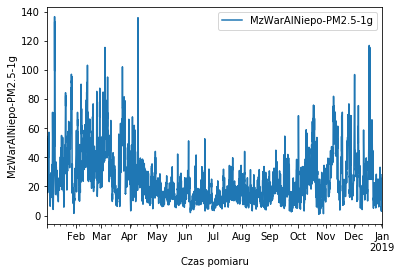

In [17]:
waw['MzWarAlNiepo-PM2.5-1g'].plot()
plt.xlabel('Czas pomiaru')
plt.ylabel(cols[0])
plt.legend()
plt.show()

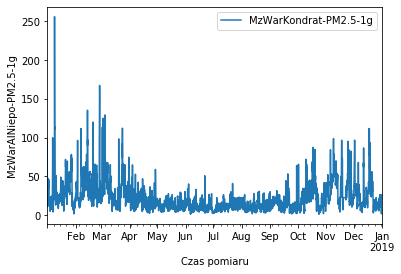

In [18]:
waw['MzWarKondrat-PM2.5-1g'].plot()
plt.xlabel('Czas pomiaru')
plt.ylabel(cols[0])
plt.legend()
plt.show()

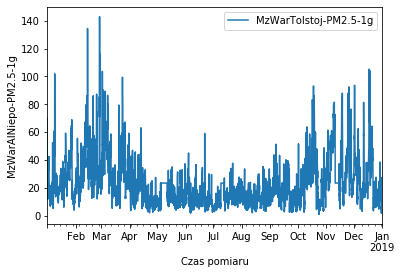

In [19]:
waw['MzWarTolstoj-PM2.5-1g'].plot()
plt.xlabel('Czas pomiaru')
plt.ylabel(cols[0])
plt.legend()
plt.show()

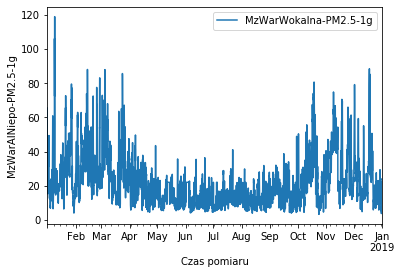

In [20]:
waw['MzWarWokalna-PM2.5-1g'].plot()
plt.xlabel('Czas pomiaru')
plt.ylabel(cols[0])
plt.legend()
plt.show()

# Histogram

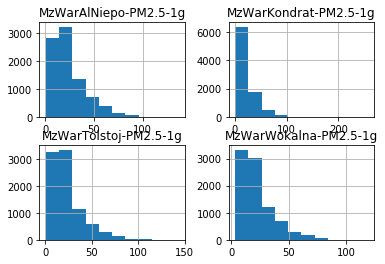

In [21]:
waw.hist()
plt.show()

# Wykres pudełkowy

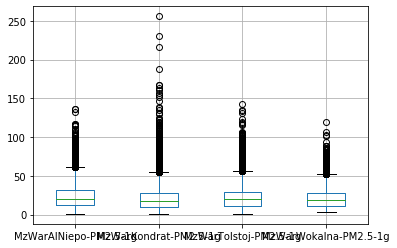

In [22]:
waw.boxplot()
plt.show()

# Wykres Q-Q

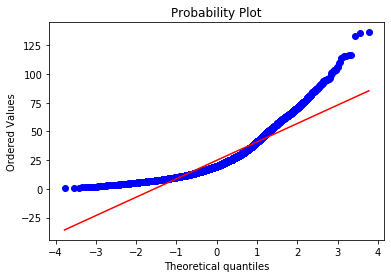

In [23]:
import pylab 
import scipy.stats as stats


stats.probplot(waw['MzWarAlNiepo-PM2.5-1g'], dist="norm", plot=pylab)

pylab.show()

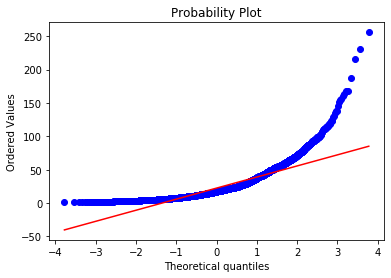

In [24]:
stats.probplot(waw['MzWarKondrat-PM2.5-1g'], dist="norm", plot=pylab)
pylab.show()

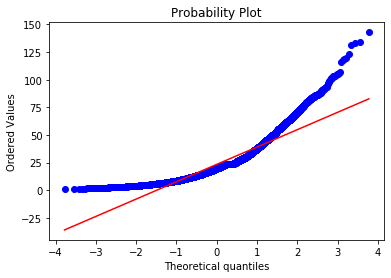

In [25]:
stats.probplot(waw['MzWarTolstoj-PM2.5-1g'], dist="norm", plot=pylab)
pylab.show()

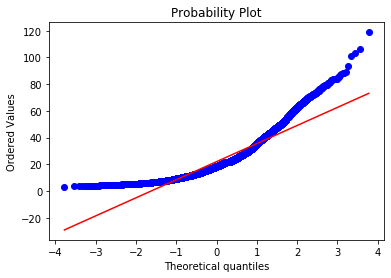

In [26]:
stats.probplot(waw['MzWarWokalna-PM2.5-1g'], dist="norm", plot=pylab)
pylab.show()

# Wykres rozrzutu dla wartości opóźnionych

In [0]:
from pandas.plotting import lag_plot

Text(0.5, 1.0, 'MzWarAlNiepo-PM2.5-1g')

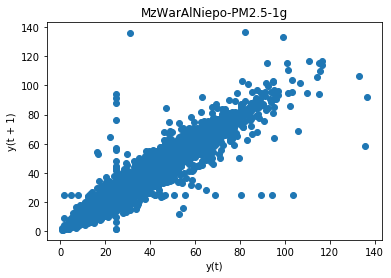

In [28]:
lag_plot(waw['MzWarAlNiepo-PM2.5-1g'], lag=1)
plt.title('MzWarAlNiepo-PM2.5-1g')

Text(0.5, 1.0, 'MzWarKondrat-PM2.5-1g')

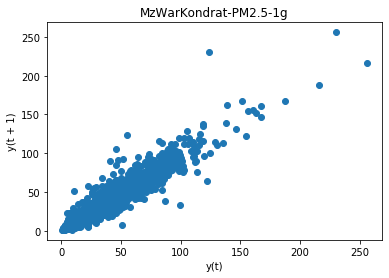

In [29]:
lag_plot(waw['MzWarKondrat-PM2.5-1g'])
plt.title('MzWarKondrat-PM2.5-1g')

Text(0.5, 1.0, 'MzWarTolstoj-PM2.5-1g')

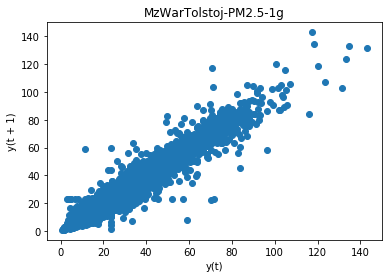

In [30]:
lag_plot(waw['MzWarTolstoj-PM2.5-1g'])
plt.title('MzWarTolstoj-PM2.5-1g')

Text(0.5, 1.0, 'MzWarWokalna-PM2.5-1g')

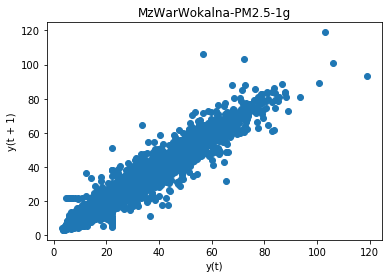

In [31]:
lag_plot(waw['MzWarWokalna-PM2.5-1g'])
plt.title('MzWarWokalna-PM2.5-1g')

# Autokorelacja - FCA

In [0]:
from pandas.plotting import autocorrelation_plot

Text(0.5, 1.0, 'MzWarAlNiepo-PM2.5-1g')

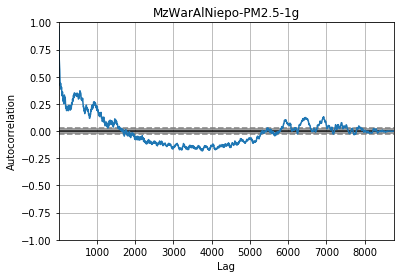

In [33]:
autocorrelation_plot(waw['MzWarAlNiepo-PM2.5-1g'])
plt.title('MzWarAlNiepo-PM2.5-1g')

Text(0.5, 1.0, 'MzWarKondrat-PM2.5-1g')

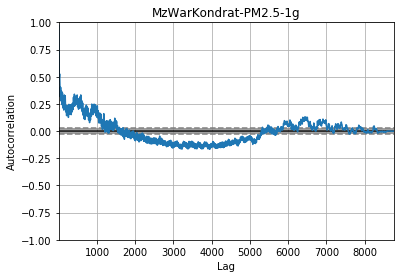

In [34]:
autocorrelation_plot(waw['MzWarKondrat-PM2.5-1g'])
plt.title('MzWarKondrat-PM2.5-1g')

Text(0.5, 1.0, 'MzWarTolstoj-PM2.5-1g')

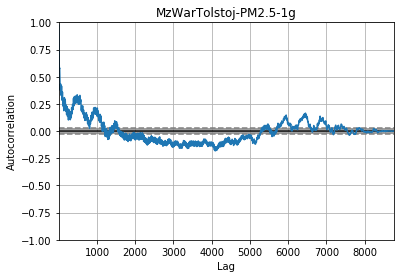

In [35]:
autocorrelation_plot(waw['MzWarTolstoj-PM2.5-1g'])
plt.title('MzWarTolstoj-PM2.5-1g')

Text(0.5, 1.0, 'MzWarWokalna-PM2.5-1g')

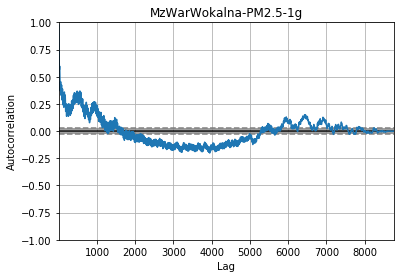

In [36]:
autocorrelation_plot(waw['MzWarWokalna-PM2.5-1g'])
plt.title('MzWarWokalna-PM2.5-1g')

# Dekompozycja

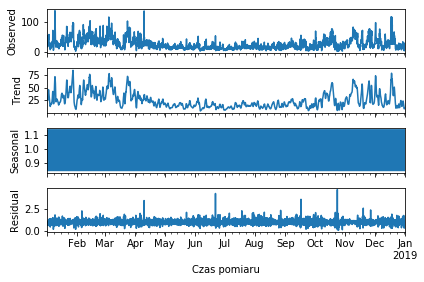

In [37]:

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(waw['MzWarAlNiepo-PM2.5-1g'], model='multiplicative')
result.plot()
plt.show()

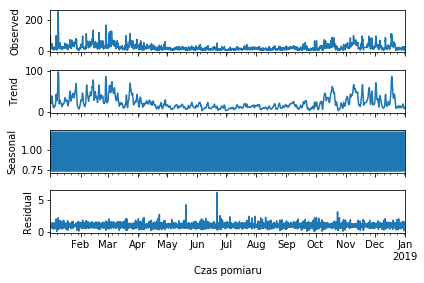

In [38]:
result = seasonal_decompose(waw['MzWarKondrat-PM2.5-1g'], model='multiplicative')
result.plot()
plt.show()

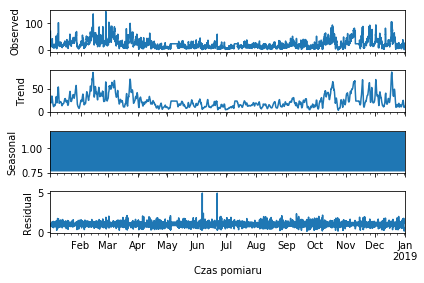

In [39]:
result = seasonal_decompose(waw['MzWarTolstoj-PM2.5-1g'], model='multiplicative')
result.plot()
plt.show()

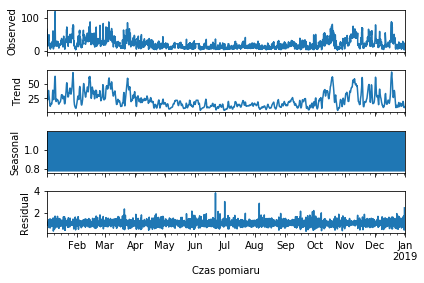

In [40]:
result = seasonal_decompose(waw['MzWarWokalna-PM2.5-1g'], model='multiplicative')
result.plot()
plt.show()

# Test Dickeya-Fullera

In [41]:

from statsmodels.tsa.stattools import adfuller

X = waw['MzWarAlNiepo-PM2.5-1g'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.551776
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [42]:
Y = waw['MzWarKondrat-PM2.5-1g'].values
result = adfuller(Y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.212581
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [43]:
Z = waw['MzWarTolstoj-PM2.5-1g'].values
result = adfuller(Z)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.652562
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [44]:
A = waw['MzWarWokalna-PM2.5-1g'].values
result = adfuller(A)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.593932
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [0]:
!git add Spotkanie1/pm_25_1g.ipynb

In [49]:
!git config --global user.email "poldus1993@gmail.com"
!git config --global user.name "Adrian"
!git commit -m "Spotkanie1 plik#1"

[master 438f6d9] Spotkanie1 plik#1
 2 files changed, 2 insertions(+)
 create mode 100644 .gitignore
 create mode 100644 Spotkanie1/pm_25_1g.ipynb


In [50]:
!git push -u origin master

Counting objects: 5, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (5/5), 430.45 KiB | 8.97 MiB/s, done.
Total 5 (delta 0), reused 0 (delta 0)
To https://github.com/dataworkshop/dw-warsaw-project.git
   61009f5..438f6d9  master -> master
Branch 'master' set up to track remote branch 'master' from 'origin'.
